## Credit Card Default Prediction_V1.4

In [1]:
#Let's start with importing necessary libraries

import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import seaborn as sns
import scikitplot as skl
sns.set()
%matplotlib inline


df = pd.read_csv('Dataset/UCI_Credit_Card.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [6]:
df.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
Def_pay      0
dtype: int64

In [3]:
#df.drop(columns=['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6', 'PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6'],inplace=True)
df.rename(columns={'PAY_0':'PAY_1'},inplace=True)
df.rename(columns={'default.payment.next.month':'Def_pay'},inplace=True)
df.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Def_pay
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_1,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [5]:
a = ProfileReport(df)
a.to_widgets()

Summarize dataset:   0%|          | 0/38 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:>

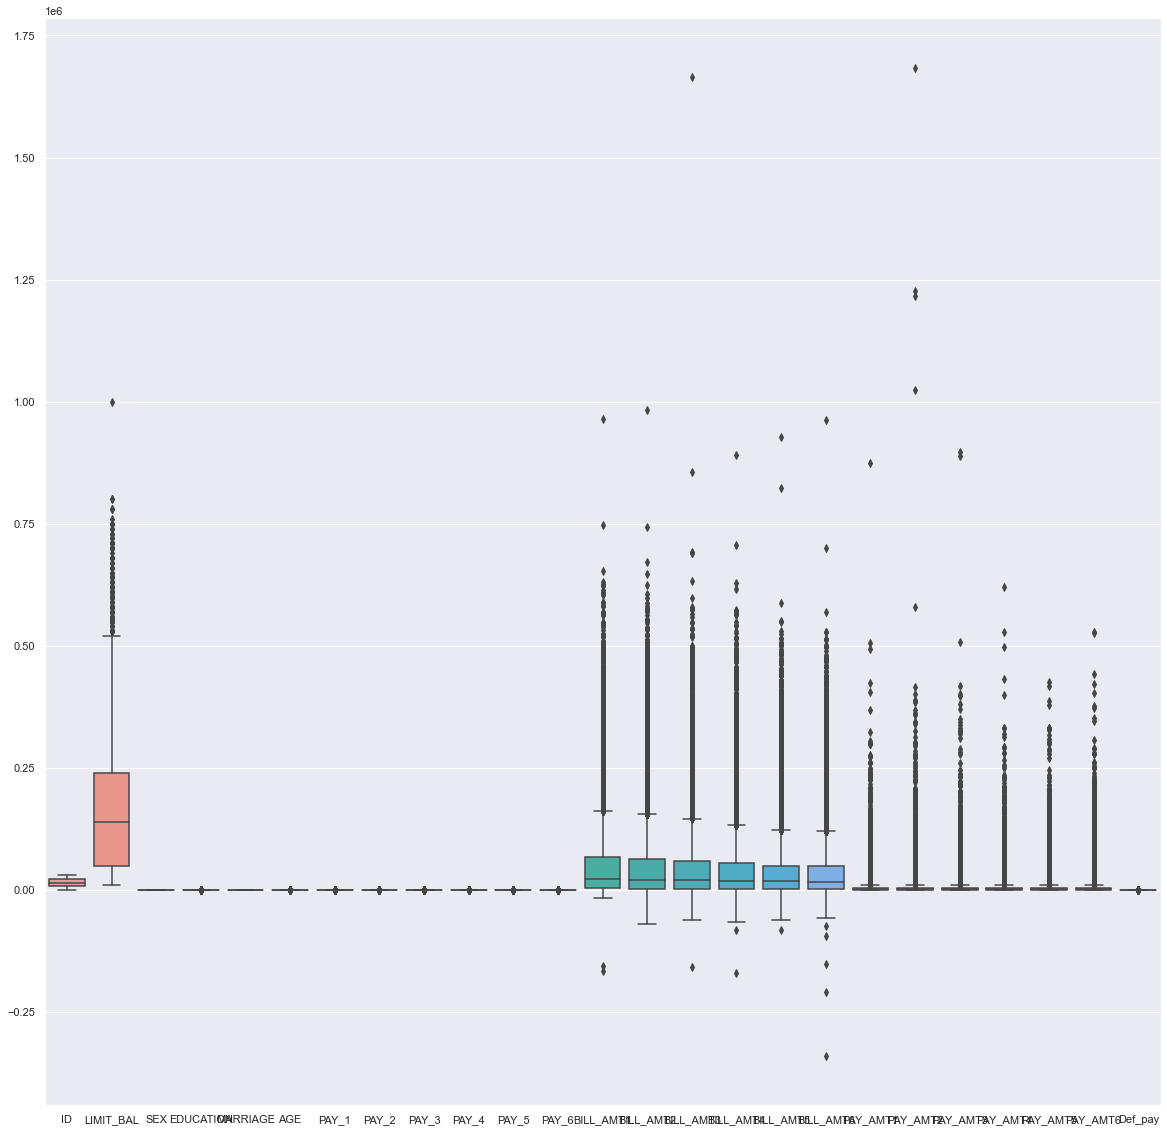

In [7]:
# Check if any outliers 
fix , ax = plt.subplots(figsize=(20,20))
sns.boxplot(data = df, ax = ax)

In [8]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Def_pay'],
      dtype='object')

In [9]:
q = df['LIMIT_BAL'].quantile(0.98)
df_cleaned = df[df['LIMIT_BAL']<q]

q = df_cleaned['SEX'].quantile(0.99)
df_cleaned  = df_cleaned[df_cleaned['SEX']<q]

q = df_cleaned['EDUCATION'].quantile(0.99)
df_cleaned  = df_cleaned[df_cleaned['EDUCATION']<q]

q = df_cleaned['MARRIAGE'].quantile(0.95)
df_cleaned  = df_cleaned[df_cleaned['MARRIAGE']<q]

q = df_cleaned['AGE'].quantile(0.99)
df_cleaned  = df_cleaned[df_cleaned['AGE']<q]

q = df_cleaned['PAY_1'].quantile(0.99)
df_cleaned  = df_cleaned[df_cleaned['PAY_1']<q]
q = df_cleaned['PAY_2'].quantile(0.99)
df_cleaned  = df_cleaned[df_cleaned['PAY_2']<q]
q = df_cleaned['PAY_3'].quantile(0.99)
df_cleaned  = df_cleaned[df_cleaned['PAY_3']<q]
q = df_cleaned['PAY_4'].quantile(0.99)
df_cleaned  = df_cleaned[df_cleaned['PAY_4']<q]
q = df_cleaned['PAY_5'].quantile(0.99)
df_cleaned  = df_cleaned[df_cleaned['PAY_5']<q]
q = df_cleaned['PAY_6'].quantile(0.99)
df_cleaned  = df_cleaned[df_cleaned['PAY_6']<q]


q = df_cleaned['BILL_AMT1'].quantile(0.99)
df_cleaned  = df_cleaned[df_cleaned['BILL_AMT1']<q]
q = df_cleaned['BILL_AMT2'].quantile(0.99)
df_cleaned  = df_cleaned[df_cleaned['BILL_AMT2']<q]
q = df_cleaned['BILL_AMT3'].quantile(0.99)
df_cleaned  = df_cleaned[df_cleaned['BILL_AMT3']<q]
q = df_cleaned['BILL_AMT4'].quantile(0.99)
df_cleaned  = df_cleaned[df_cleaned['BILL_AMT4']<q]
q = df_cleaned['BILL_AMT5'].quantile(0.99)
df_cleaned  = df_cleaned[df_cleaned['BILL_AMT5']<q]
q = df_cleaned['BILL_AMT6'].quantile(0.99)
df_cleaned  = df_cleaned[df_cleaned['BILL_AMT6']<q]

q = df_cleaned['PAY_AMT1'].quantile(0.99)
df_cleaned  = df_cleaned[df_cleaned['PAY_AMT1']<q]
q = df_cleaned['PAY_AMT2'].quantile(0.99)
df_cleaned  = df_cleaned[df_cleaned['PAY_AMT2']<q]
q = df_cleaned['PAY_AMT3'].quantile(0.99)
df_cleaned  = df_cleaned[df_cleaned['PAY_AMT3']<q]
q = df_cleaned['PAY_AMT4'].quantile(0.99)
df_cleaned  = df_cleaned[df_cleaned['PAY_AMT4']<q]
q = df_cleaned['PAY_AMT5'].quantile(0.99)
df_cleaned  = df_cleaned[df_cleaned['PAY_AMT5']<q]
q = df_cleaned['PAY_AMT6'].quantile(0.99)
df_cleaned  = df_cleaned[df_cleaned['PAY_AMT6']<q]



In [10]:
a = ProfileReport(df_cleaned)
a.to_widgets()

Summarize dataset:   0%|          | 0/39 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:>

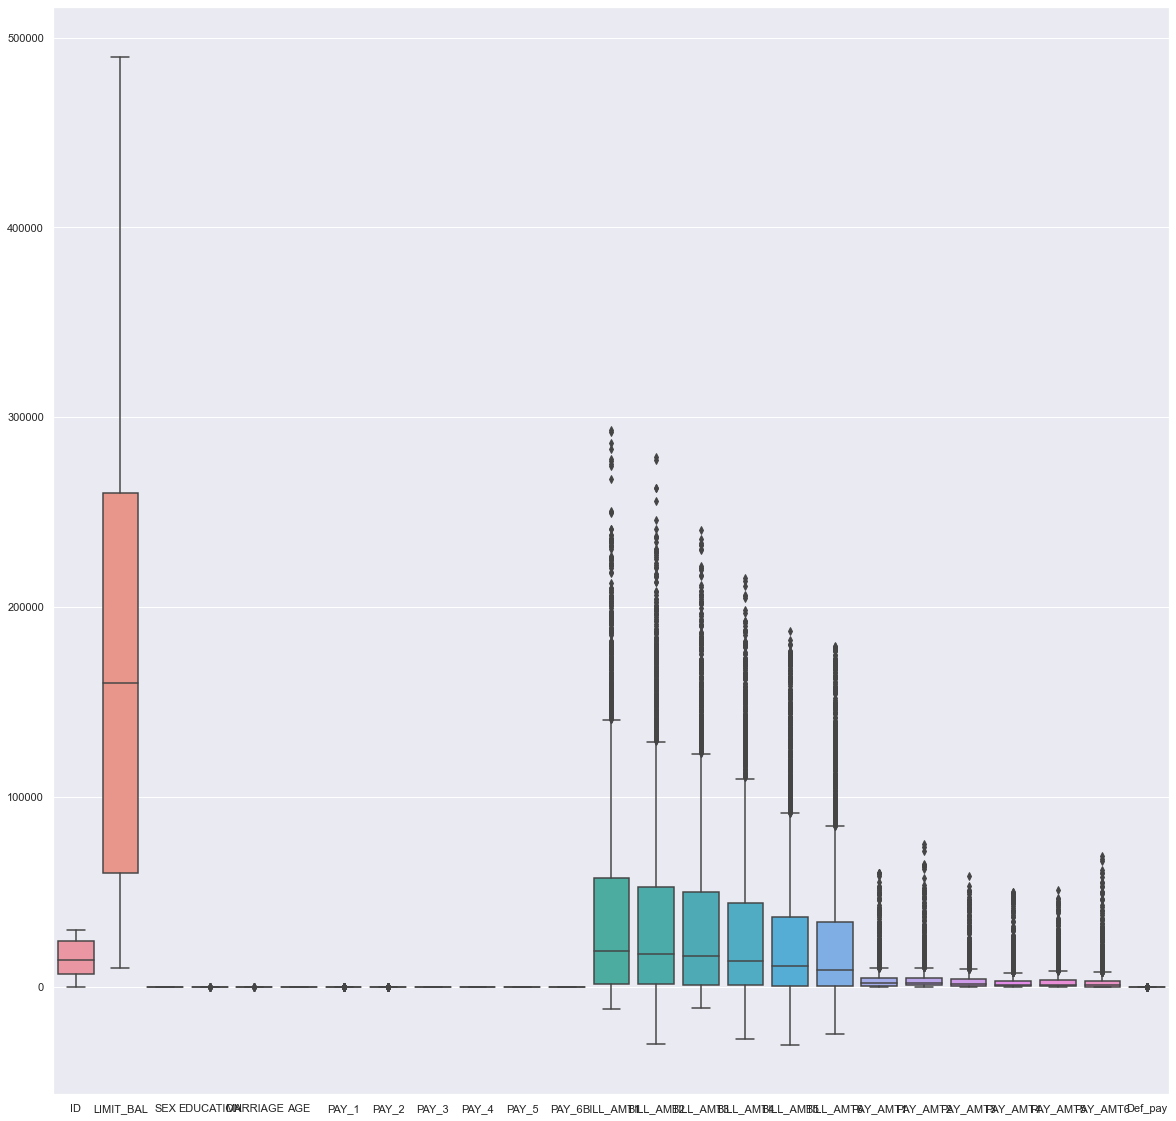

In [11]:
# Check if any outliers 
fix , ax = plt.subplots(figsize=(20,20))
sns.boxplot(data = df_cleaned, ax = ax)

In [45]:
X = df_cleaned.drop(columns = ['BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','Def_pay'])
y = df_cleaned['Def_pay']

In [46]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [47]:
X_scaled

array([[-1.65765272e+00, -1.02783919e+00,  0.00000000e+00, ...,
         1.06137554e+00, -4.33680866e-01, -3.80866132e-01],
       [-1.65409906e+00,  8.54499913e-01,  0.00000000e+00, ...,
         5.98979582e-01,  6.34528285e-01,  5.95144989e-01],
       [-1.65132275e+00, -8.64157529e-01,  0.00000000e+00, ...,
        -1.83536654e-01, -1.42183137e-03, -4.90260577e-01],
       ...,
       [ 1.67257748e+00, -1.35520251e+00,  0.00000000e+00, ...,
        -5.39225852e-01, -5.62554287e-01, -4.90260577e-01],
       [ 1.67291063e+00,  3.63454929e-01,  0.00000000e+00, ...,
         2.66664130e-03,  3.72666472e-01, -3.29149464e-01],
       [ 1.67335484e+00, -1.02783919e+00,  0.00000000e+00, ...,
        -3.61381253e-01, -3.75510135e-01, -3.29149464e-01]])

In [48]:
def vif_score(x):
    scalar = StandardScaler()
    arr = scalar.fit_transform(x)
    return pd.DataFrame([[x.columns[i],variance_inflation_factor(arr,i)] for i in range (arr.shape[1])],columns=["Feature","VIF Score"])

In [49]:
vif_score(X)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,Feature,VIF Score
0,ID,1.014830
1,LIMIT_BAL,1.477667
2,SEX,NaN
3,EDUCATION,1.139101
4,MARRIAGE,1.008949
5,AGE,1.011991
6,PAY_1,1.448173
7,PAY_2,2.550989
8,PAY_3,6.629270
9,PAY_4,8.473661


In [50]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25, random_state = 355)

In [51]:
log_reg = LogisticRegression(verbose=1,n_jobs=4, solver='liblinear')

log_reg.fit(x_train,y_train)

[LibLinear]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  warnings.warn("'n_jobs' > 1 does not have any effect when"


LogisticRegression(n_jobs=4, solver='liblinear', verbose=1)

In [52]:
log_reg.predict([x_test[0]])

array([0], dtype=int64)

In [53]:
log_reg.predict([x_test[8]])

array([0], dtype=int64)

In [54]:
log_reg.predict([[1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,0,689,0,0,0,0]])

array([0], dtype=int64)

In [55]:
y_pred = log_reg.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8102189781021898

In [56]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[660,   4],
       [152,   6]], dtype=int64)

In [57]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [58]:
# Breaking down the formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.8102189781021898

In [59]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.9939759036144579

In [60]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.812807881773399

In [61]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.894308943089431

In [62]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred)
auc

0.5159752935793808

#### ROC

In [63]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

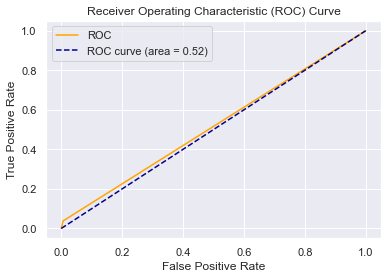

In [64]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()